In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from google.colab import drive


In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# upload tb cases dataset and display top 5 rows
tb_df = pd.read_csv('/content/drive/MyDrive/Resources/merged_cases.csv')
tb_df.head()

,Year,Geography,American Indian/Alaska Native,Asian,Black/African American,Hispanic/Latino,Multiracial,Native Hawaiian/Other Pacific Islander,Unknown,White,...,Non-U.S.–born,U.S.-born,0-4,15-24,25-34,35-44,45-54,5-14,55-64,65+
0,2000,Alabama,1,7,177,12,0,0,0,113,...,22,288,8.0,16.0,29.0,62.0,51.0,8.0,38.0,98.0
1,2000,Alaska,71,15,9,2,0,2,0,9,...,15,93,18.0,13.0,8.0,26.0,8.0,11.0,12.0,12.0
2,2000,Arizona,29,28,21,140,0,1,0,42,...,148,112,12.0,33.0,43.0,48.0,43.0,6.0,22.0,54.0
3,2000,Arkansas,1,10,71,20,0,6,4,87,...,31,165,9.0,20.0,17.0,24.0,24.0,16.0,20.0,69.0
4,2000,California,15,"1,333",318,"1,201",0,20,17,384,...,"2,369",904,115.0,327.0,537.0,520.0,505.0,89.0,433.0,762.0


# New Section

In [22]:
#show column names
tb_df.columns

Index(['Year', 'Geography', 'American Indian/Alaska Native', 'Asian',
       'Black/African American', 'Hispanic/Latino', 'Multiracial',
       'Native Hawaiian/Other Pacific Islander', 'Unknown', 'White', 'Female',
       'Male', 'Non-U.S.–born', 'U.S.-born', '0-4', '15-24', '25-34', '35-44',
       '45-54', '5-14', '55-64', '65+'],
      dtype='object')

In [23]:
#drop unnecessary columns, check updated columns list and data types
tb_df.drop(['Geography', 'American Indian/Alaska Native', 'Asian',
       'Black/African American', 'Hispanic/Latino', 'Multiracial',
       'Native Hawaiian/Other Pacific Islander', 'Unknown', 'White'], axis=1, inplace=True)
tb_df.dtypes

Year              object
Female            object
Male              object
Non-U.S.–born     object
U.S.-born          int64
0-4              float64
15-24            float64
25-34            float64
35-44            float64
45-54            float64
5-14             float64
55-64            float64
65+              float64
dtype: object

In [24]:
#strip all the , s out from numbers and remove (COVID-19 Pandemic) from year column
tb_df = tb_df.replace({',': '', ' \(COVID-19 Pandemic\)': ''}, regex=True)
#convert incorrectly classified object columns to integers
convert_columns = ['Year', 'Female','Male', 'Non-U.S.–born']
tb_df[convert_columns] = tb_df[convert_columns].astype(int)
tb_df.dtypes

Year               int64
Female             int64
Male               int64
Non-U.S.–born      int64
U.S.-born          int64
0-4              float64
15-24            float64
25-34            float64
35-44            float64
45-54            float64
5-14             float64
55-64            float64
65+              float64
dtype: object

In [25]:
#create a per state total by adding female and male columns together
tb_df['Total_Cases'] = tb_df['Female'] + tb_df['Male']
tb_df.head()

,Year,Female,Male,Non-U.S.–born,U.S.-born,0-4,15-24,25-34,35-44,45-54,5-14,55-64,65+,Total_Cases
0,2000,91,219,22,288,8.0,16.0,29.0,62.0,51.0,8.0,38.0,98.0,310
1,2000,41,67,15,93,18.0,13.0,8.0,26.0,8.0,11.0,12.0,12.0,108
2,2000,83,178,148,112,12.0,33.0,43.0,48.0,43.0,6.0,22.0,54.0,261
3,2000,70,129,31,165,9.0,20.0,17.0,24.0,24.0,16.0,20.0,69.0,199
4,2000,1316,1972,2369,904,115.0,327.0,537.0,520.0,505.0,89.0,433.0,762.0,3288


In [53]:
#groupby year, ignore state stratification, ignore years after 2019
tb_filtered = tb_df[tb_df['Year'] < 2020]
tb_filtered = tb_filtered.groupby('Year').sum().reset_index()
tb_filtered.head()

,Year,Female,Male,Non-U.S.–born,U.S.-born,0-4,15-24,25-34,35-44,45-54,5-14,55-64,65+,Total_Cases
0,2000,6105,10203,7634,8632,544.0,1618.0,2650.0,2926.0,2692.0,420.0,1943.0,3515.0,16308
1,2001,6033,9912,8034,7848,543.0,1597.0,2748.0,2862.0,2655.0,386.0,1860.0,3293.0,15945
2,2002,5869,9185,7737,7263,556.0,1498.0,2549.0,2739.0,2479.0,388.0,1703.0,3142.0,15054
3,2003,5756,9078,7948,6842,547.0,1573.0,2486.0,2588.0,2546.0,364.0,1738.0,2994.0,14834
4,2004,5601,8891,7875,6601,549.0,1603.0,2430.0,2509.0,2501.0,403.0,1692.0,2811.0,14492


In [54]:
tb_filtered['Year_no'] = np.arange(len(tb_filtered.index))
tb_filtered.head()

,Year,Female,Male,Non-U.S.–born,U.S.-born,0-4,15-24,25-34,35-44,45-54,5-14,55-64,65+,Total_Cases,Year_no
0,2000,6105,10203,7634,8632,544.0,1618.0,2650.0,2926.0,2692.0,420.0,1943.0,3515.0,16308,0
1,2001,6033,9912,8034,7848,543.0,1597.0,2748.0,2862.0,2655.0,386.0,1860.0,3293.0,15945,1
2,2002,5869,9185,7737,7263,556.0,1498.0,2549.0,2739.0,2479.0,388.0,1703.0,3142.0,15054,2
3,2003,5756,9078,7948,6842,547.0,1573.0,2486.0,2588.0,2546.0,364.0,1738.0,2994.0,14834,3
4,2004,5601,8891,7875,6601,549.0,1603.0,2430.0,2509.0,2501.0,403.0,1692.0,2811.0,14492,4


In [55]:

#split data to feature (year) and target (total cases)
X = tb_filtered[['Year_no']]
y = tb_filtered['Total_Cases']

model = LinearRegression()
model.fit(X, y)

#create list of years to predict, initilaze df to hold predictions
predicted_year_no = [20, 21, 22, 23]
predicted_year = [2020, 2021, 2022, 2023]


predictions = model.predict([[year] for year in predicted_year_no])


# Convert the dictionary to a DataFrame
tb_predictions = pd.DataFrame(predictions, columns=['Total_cases'])

#add Year column
tb_predictions['Year'] = predicted_year

# Display the predictions DataFrame
print(tb_predictions)


   Total_cases  Year
0  7390.152632  2020
1  6959.919549  2021
2  6529.686466  2022
3  6099.453383  2023


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
columns_to_add = ['Female', 'Male', 'Non-U.S.–born', 'U.S.-born',
                  '0-4', '15-24', '25-34', '35-44','45-54', '5-14', '55-64', '65+']

X_train = tb_filtered[['Year_no']]

for column in columns_to_add:
  y_train = tb_filtered[column]
  model = LinearRegression()
  model.fit(X_train, y_train)
  tb_predictions[column] = model.predict([[year] for year in predicted_year_no])

print(tb_predictions)

   Total_cases  Year       Female         Male  Non-U.S.–born    U.S.-born  \
0  7390.152632  2020  2945.810526  4444.342105    5912.252632  1486.557895   
1  6959.919549  2021  2787.521053  4172.398496    5802.990977  1168.358647   
2  6529.686466  2022  2629.231579  3900.454887    5693.729323   850.159398   
3  6099.453383  2023  2470.942105  3628.511278    5584.467669   531.960150   

          0-4       15-24        25-34       35-44        45-54        5-14  \
0  150.789474  723.694737  1200.442105  854.073684  1020.800000  122.821053   
1  128.564662  674.260902  1123.884211  754.847368   933.442857  108.299248   
2  106.339850  624.827068  1047.326316  655.621053   846.085714   93.777444   
3   84.115038  575.393233   970.768421  556.394737   758.728571   79.255639   

         55-64          65+  
0  1371.357895  1947.073684  
1  1348.458647  1889.033083  
2  1325.559398  1830.992481  
3  1302.660150  1772.951880  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [57]:
# Export the DataFrame to a CSV file
file_path = '/content/drive/My Drive/predictions2.csv'

# Export the DataFrame to a CSV file
tb_predictions.to_csv(file_path, index=False)

In [60]:
#group tb_df by year for graphing
tb_df = tb_df.groupby('Year').sum().reset_index()
tb_df.head()

,Year,Female,Male,Non-U.S.–born,U.S.-born,0-4,15-24,25-34,35-44,45-54,5-14,55-64,65+,Total_Cases
0,2000,6105,10203,7634,8632,544.0,1618.0,2650.0,2926.0,2692.0,420.0,1943.0,3515.0,16308
1,2001,6033,9912,8034,7848,543.0,1597.0,2748.0,2862.0,2655.0,386.0,1860.0,3293.0,15945
2,2002,5869,9185,7737,7263,556.0,1498.0,2549.0,2739.0,2479.0,388.0,1703.0,3142.0,15054
3,2003,5756,9078,7948,6842,547.0,1573.0,2486.0,2588.0,2546.0,364.0,1738.0,2994.0,14834
4,2004,5601,8891,7875,6601,549.0,1603.0,2430.0,2509.0,2501.0,403.0,1692.0,2811.0,14492


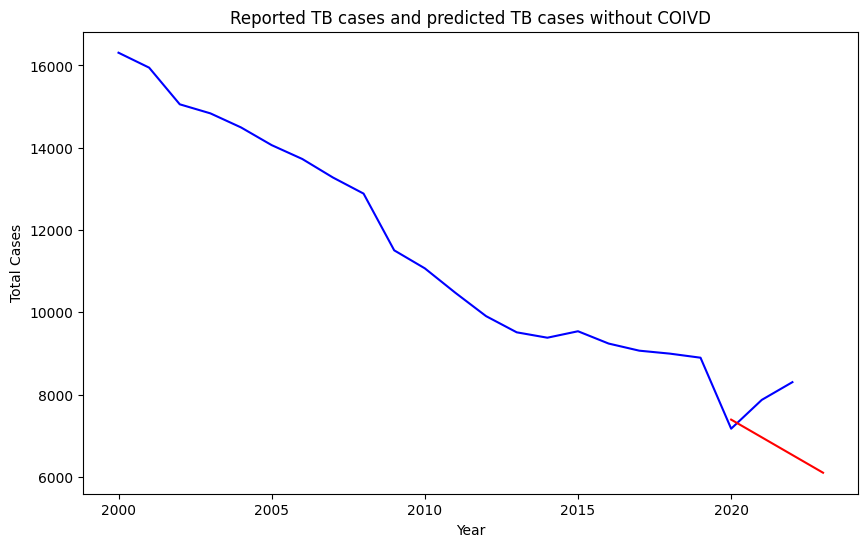

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(tb_df['Year'], tb_df['Total_Cases'], label='Reported Cases', color='blue')
plt.plot(tb_predictions['Year'], tb_predictions['Total_cases'], label='Predicted Cases', color='red')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Reported TB cases and predicted TB cases without COIVD')

plt.show()
